In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the T-Shirt data

In [2]:
file_path = r"D:\LIUZHICHENG\Udemy\Machine Learning\Classification Bootmap\ML Classification Package\5. K Nearest Neighbours\Tshirt_Sizing_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [3]:
df.isnull().sum()

Height (in cms)    0
Weight (in kgs)    0
T Shirt Size       0
dtype: int64

## EDA

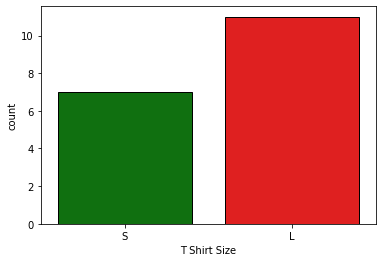

In [4]:
sns.countplot(data=df, x="T Shirt Size", 
              palette={"S": "Green", "L": "Red"},
              edgecolor="black"
             );

## Data Preprocessing

In [5]:
X = df.drop(columns="T Shirt Size").to_numpy()
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [6]:
y = df["T Shirt Size"].to_numpy()
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

### tts

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# how many neighbors do you have, 5 
# metric='minkowski', p=2 means euclidean distance
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 

clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_knn.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           L       1.00      1.00      1.00         2
           S       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

1.0
[[2 0]
 [0 3]]


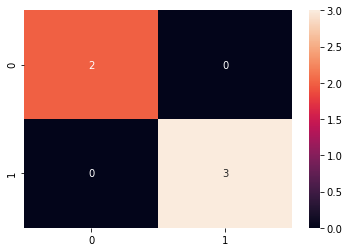

In [11]:
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True);

### Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=clf_knn, X=X_train, y=y_train, cv=4)
print(accuracies)
print(f"Mean: {accuracies.mean() * 100} %")
print(f"Std: {accuracies.std() * 100} %")

[1.         0.66666667 0.66666667 1.        ]
Mean: 83.33333333333333 %
Std: 16.666666666666668 %


### Grid Search

In [13]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [5, 4, 3, 2, 1], 
    "metric": ['minkowski'], 
    "p": [2]
}

grid_search = GridSearchCV(estimator=clf_knn, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_index_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Perry\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KNeighborsClassifier(n_neighbors=3)
{'metric': 'minkowski', 'n_neighbors': 3, 'p': 2}
0.9333333333333332
2
Wall time: 3.83 s


In [14]:
grid_predictions = grid_search.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           L       0.67      1.00      0.80         2
           S       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

0.8
[[2 0]
 [1 2]]
